## AIM - Prediction of Outlet_sales

Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/content/train_v9rqX0R.csv")
test = pd.read_csv("/content/test_AbJTz2l.csv")

In [3]:
data= pd.concat([train,test],axis = 0)   # This data  is set for non-manupulation
data.reset_index()
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [4]:
df = pd.concat([train,test],axis = 0)  
df.reset_index(drop=True, inplace=True)
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [5]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Data Analysis

<ipython-input-28-fd2a70e285cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = data.corr(), annot=True)


<Axes: >

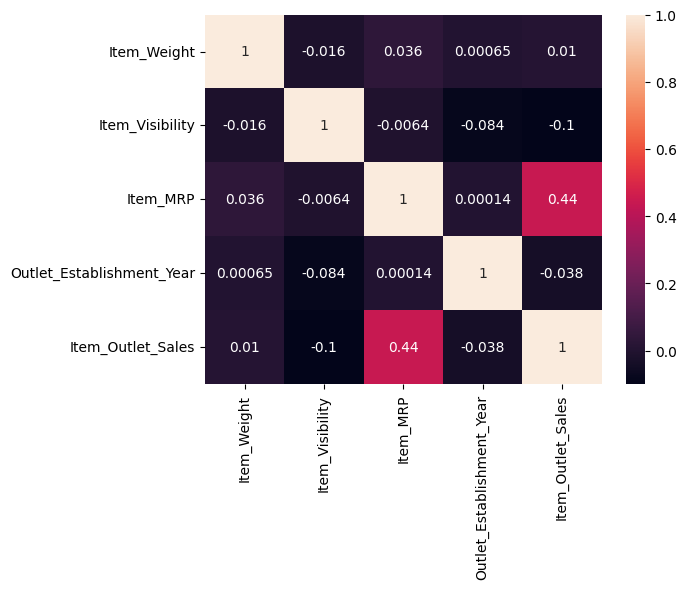

In [28]:
sns.heatmap(data = data.corr(), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

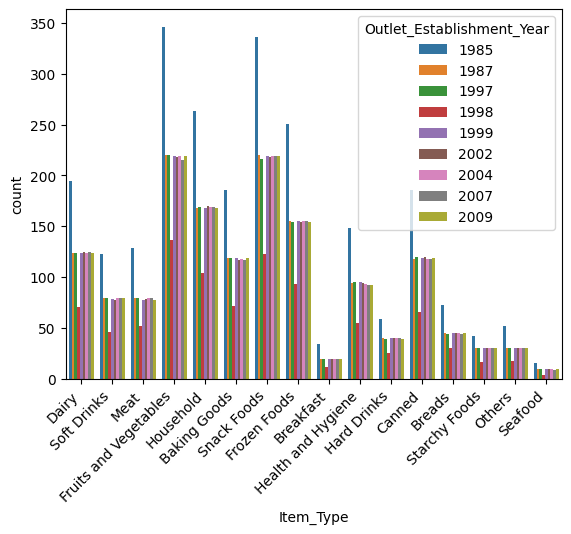

In [8]:
sns.countplot( x = data['Item_Type'],hue= (data['Outlet_Establishment_Year']) )
plt.xticks(rotation = 45, ha = 'right')

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

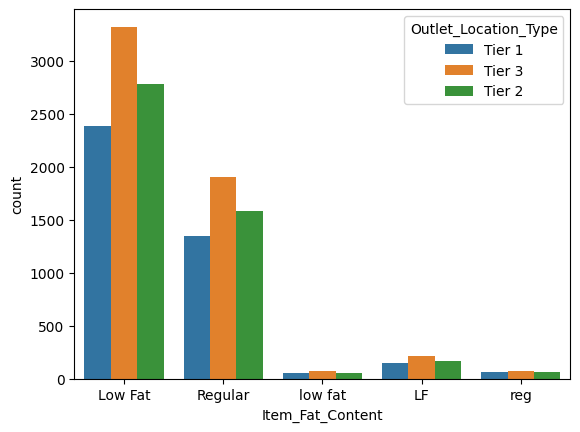

In [9]:
sns.countplot(x = data['Item_Fat_Content'],hue = data['Outlet_Location_Type'])

<Axes: xlabel='Item_Type', ylabel='count'>

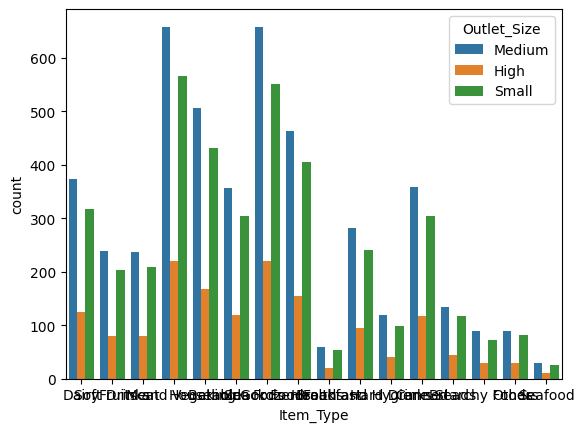

In [10]:
sns.countplot(x = data['Item_Type'],hue = data['Outlet_Size'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

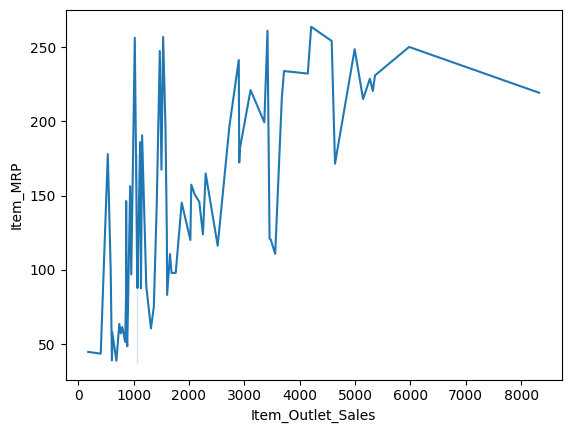

In [11]:
drinks_2002_sales = df[(df['Item_Type']=='Dairy') & (df['Outlet_Establishment_Year']==2002)]
drinks_2002_sales
sns.lineplot(x = drinks_2002_sales['Item_Outlet_Sales'],y = drinks_2002_sales['Item_MRP'])

In [12]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

Preprocessing the data 

In [13]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [14]:
df = df.drop(columns = ['Item_Identifier'])

In [15]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean())
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [16]:
data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean())

Label Encoding 

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

Training data

In [18]:
x = df.drop(columns=['Item_Outlet_Sales','Outlet_Establishment_Year',])
y = df['Item_Outlet_Sales']

Training model (Random Forest Regressor)

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()

In [20]:
model.score(x,y)

0.9005834045413005

In [21]:
pred = model.predict(x)
pred.shape

(14204,)

Final Outcome 

In [22]:
submission = pd.DataFrame({'Item_ID':data['Item_Identifier'],
                           'Outlet_Identifier':data['Outlet_Identifier'],
                           'True_sales':data['Item_Outlet_Sales'],
                           'pred_sales':pred})
submission.reset_index()

,index,Item_ID,Outlet_Identifier,True_sales,pred_sales
0,0,FDA15,OUT049,3735.138000,3530.287490
1,1,DRC01,OUT018,443.422800,757.578492
2,2,FDN15,OUT049,2097.270000,2117.448360
3,3,FDX07,OUT010,732.380000,934.316383
4,4,NCD19,OUT013,994.705200,1132.317112
...,...,...,...,...,...
14199,5676,FDB58,OUT046,2181.288914,2275.808172
14200,5677,FDD47,OUT018,2181.288914,2382.913108
14201,5678,NCO17,OUT045,2181.288914,2123.725107
14202,5679,FDJ26,OUT017,2181.288914,2778.419563


Submission data 

In [23]:
submission.to_csv("submission.csv")
from google.colab import files
files.download(f"./submission.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>